In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
spotify = pd.read_csv('../raw_data/dataset.csv')

In [3]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [16]:
spotify.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Length: 114000, dtype: bool

In [17]:
spotify.isnull()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# feautures of interest in this project

selected_features = spotify[['danceability', 'energy', 'valence', 'tempo']]
selected_features

,danceability,energy,valence,tempo
0,0.676,0.4610,0.7150,87.917
1,0.420,0.1660,0.2670,77.489
2,0.438,0.3590,0.1200,76.332
3,0.266,0.0596,0.1430,181.740
4,0.618,0.4430,0.1670,119.949
...,...,...,...,...
113995,0.172,0.2350,0.0339,125.995
113996,0.174,0.1170,0.0350,85.239
113997,0.629,0.3290,0.7430,132.378
113998,0.587,0.5060,0.4130,135.960


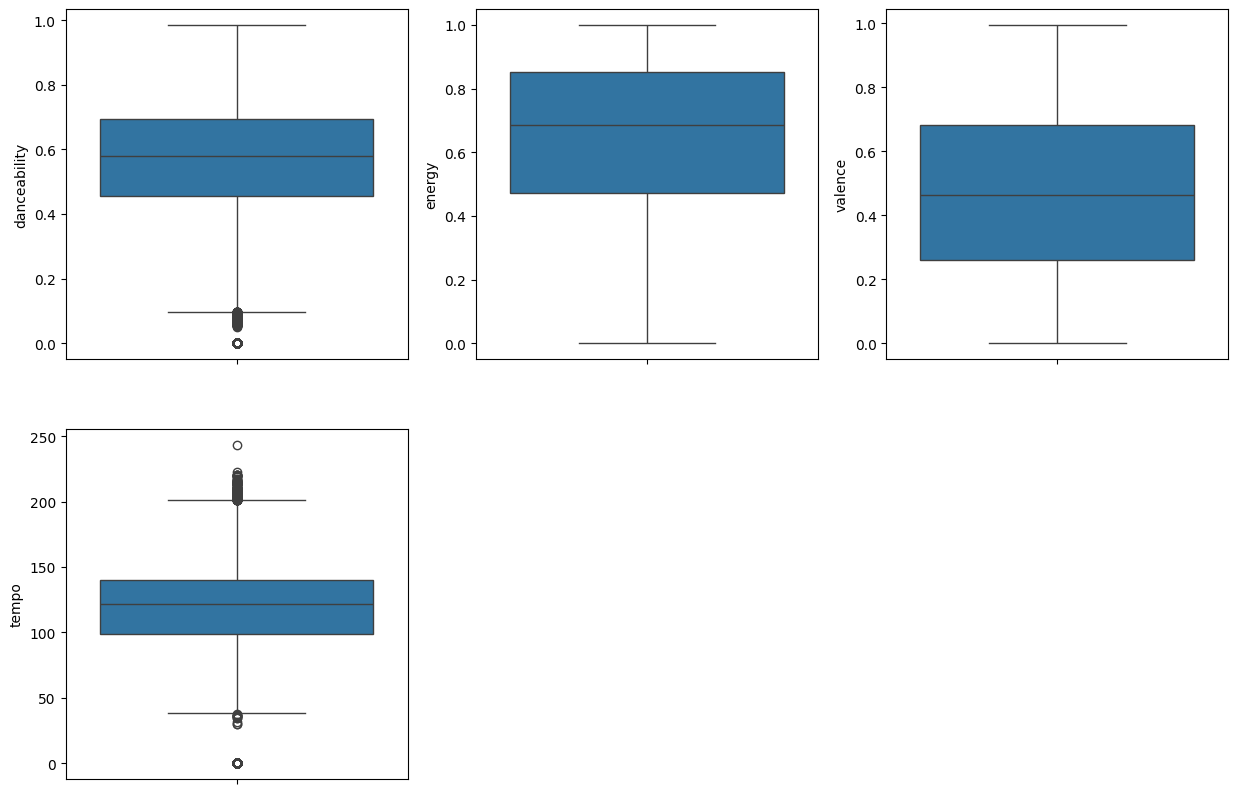

In [22]:
# checking the outliers

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_features.columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(data = spotify, y = column)

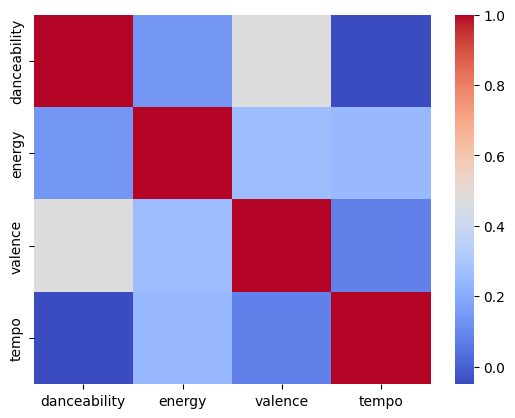

In [23]:
# the selected features are relatively correlated, so we need to apply PCA to reduce the multicolinearity before clustering

sns.heatmap(pd.DataFrame(selected_features).corr(), cmap='coolwarm');

In [24]:
# the best scaler for PCA is StandardScaler

scaler = StandardScaler()

scaler.fit(selected_features)
spotify_scaled_tr = scaler.transform(selected_features)

columns = selected_features.columns

spotify_scaled = pd.DataFrame(spotify_scaled_tr, columns = columns)
spotify_scaled

,danceability,energy,valence,tempo
0,0.629244,-0.717148,0.929306,-1.141863
1,-0.845908,-1.889980,-0.798690,-1.489717
2,-0.742186,-1.122669,-1.365688,-1.528312
3,-1.733304,-2.312994,-1.276974,1.987859
4,0.295030,-0.788711,-1.184403,-0.073348
...,...,...,...,...
113995,-2.274962,-1.615656,-1.697787,0.128333
113996,-2.263437,-2.084789,-1.693545,-1.231195
113997,0.358416,-1.241940,1.037306,0.341255
113998,0.116398,-0.538241,-0.235548,0.460742


In [25]:
pca = PCA()

spotify_scaled_pca = pca.fit_transform(spotify_scaled)

pd.DataFrame(spotify_scaled_pca)

,0,1,2,3
0,0.371205,-1.642659,-0.089917,0.483220
1,-2.199361,-1.449343,-0.184148,0.415994
2,-2.155291,-1.057982,0.467845,-0.169069
3,-2.452420,1.434585,-2.398051,0.336875
4,-0.979733,-0.310923,-0.432737,-0.934605
...,...,...,...,...
113995,-3.107439,0.690040,-0.552636,0.497003
113996,-3.612483,-0.545437,-0.060428,0.708691
113997,0.364009,-0.680443,-1.356906,0.653175
113998,-0.237264,0.091974,-0.675932,-0.222220


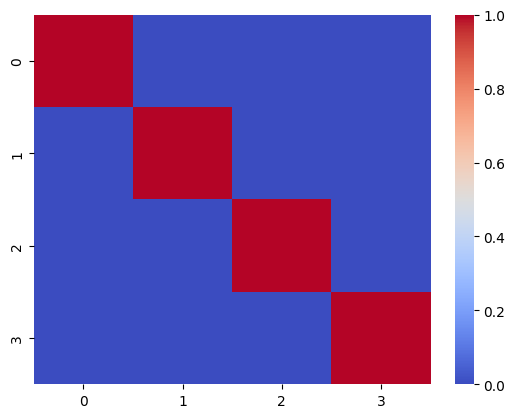

In [26]:
#  the PCA reduced multicolinearity to the absolute minimum and features are not correlated with eachother

sns.heatmap(pd.DataFrame(spotify_scaled_pca).corr(), cmap = 'coolwarm');

In [27]:
# PCA rank

pca.explained_variance_ratio_

array([0.40857273, 0.29039577, 0.17610341, 0.12492809])

In [28]:
# unsupervised learning by kmeans model

kmeans = KMeans(n_clusters = 3)
spotify_pca = kmeans.fit(spotify_scaled_pca)
spotify_pca

KMeans(n_clusters=3)

In [29]:
kmeans.cluster_centers_.shape

(3, 4)

In [30]:
labels = kmeans.labels_
labels

array([2, 0, 0, ..., 2, 1, 2], dtype=int32)

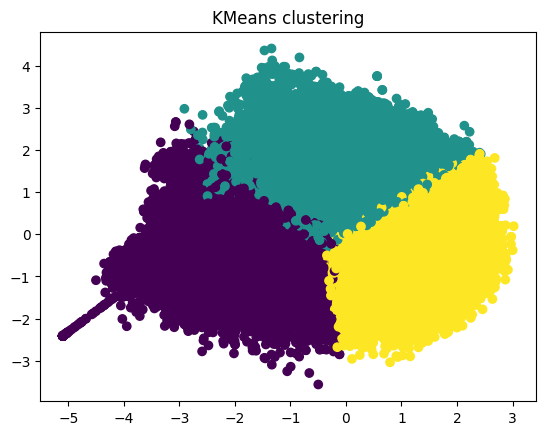

In [31]:
plt.scatter(pd.DataFrame(spotify_scaled_pca).iloc[:,0], pd.DataFrame(spotify_scaled_pca).iloc[:,1], c = labels)
plt.title('KMeans clustering');

In [ ]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
wcss_values = []
K = range(2, 4)  # Testing different cluster counts from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(spotify_scaled_pca)
    labels = kmeans.labels_
    sil_score = silhouette_score(spotify_scaled_pca, labels)
    silhouette_scores.append(sil_score)
    wcss_values.append(kmeans.inertia_)


In [ ]:
# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different numbers of clusters')

In [ ]:
# Plot WCSS
plt.figure(figsize=(10, 5))
plt.plot(K, wcss_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS for different numbers of clusters')